<a href="https://colab.research.google.com/github/lhs02/lhs02/blob/main/EstatisticaB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv.csv to MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv (9).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1107 non-null   object
 1   Marca           1107 non-null   object
 2   Preco_Normal    1107 non-null   int64 
 3   Preco_Desconto  1107 non-null   int64 
 4   Preco_Anterior  1107 non-null   int64 
 5   Desconto        1107 non-null   int64 
 6   Categoria       1107 non-null   object
dtypes: int64(4), object(3)
memory usage: 60.7+ KB
None

Média, Mediana e Desvio Padrão por Categoria:
                    Categoria         mean  median          std
5                     lacteos  2385.219239   989.0  3925.816164
0  belleza-y-cuidado-personal  1783.556485  1569.0  2210.041719
2    

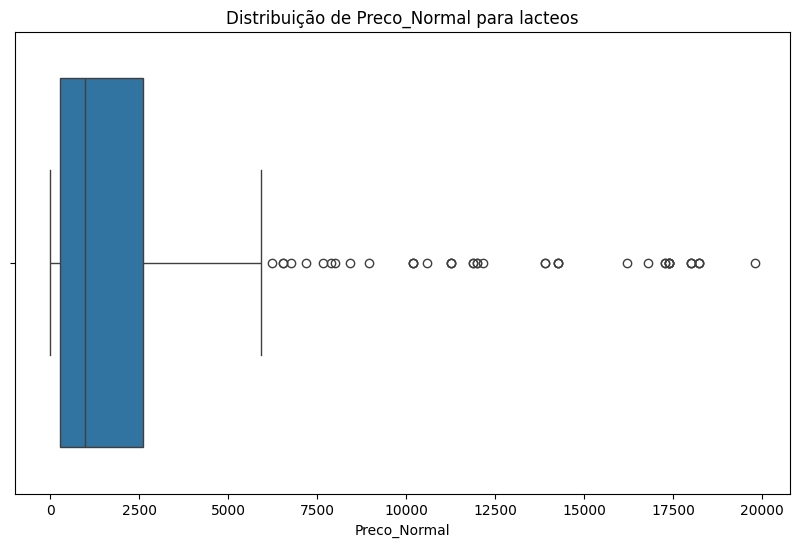

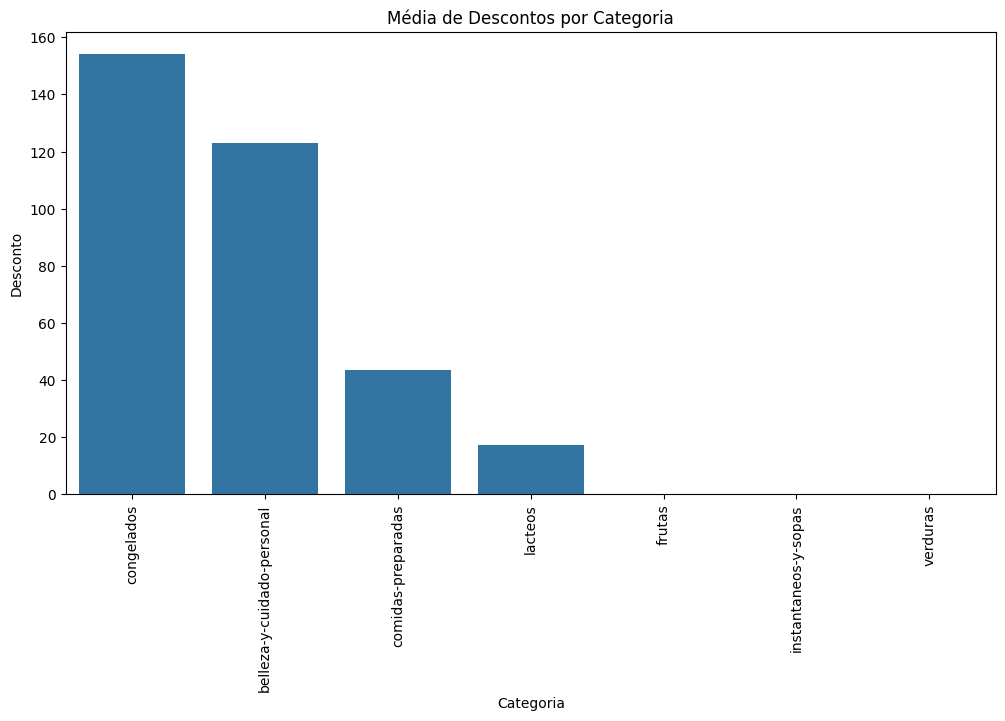

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files

# Carregar o arquivo CSV do Google Colab
uploaded = files.upload()
file_path = list(uploaded.keys())[0]  # Pega o nome correto do arquivo

# Carregar o arquivo CSV
df = pd.read_csv(file_path)

# Exibir informações gerais do DataFrame
print(df.info())

# Média, mediana e desvio padrão por categoria
estatisticas = df.groupby('Categoria')['Preco_Normal'].agg(['mean', 'median', 'std']).reset_index()
estatisticas = estatisticas.sort_values(by='std', ascending=False)

print("\nMédia, Mediana e Desvio Padrão por Categoria:")
print(estatisticas)

# Identificar a categoria com maior desvio padrão
categoria_maior_desvio = estatisticas.iloc[0]['Categoria']
print(f"\nCategoria com maior desvio padrão: {categoria_maior_desvio}")

# Plotar o boxplot dessa categoria
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['Categoria'] == categoria_maior_desvio], x='Preco_Normal')
plt.title(f'Distribuição de Preco_Normal para {categoria_maior_desvio}')
plt.show()

# Gráfico de barras com a média de descontos por categoria
desconto_por_categoria = df.groupby('Categoria')['Desconto'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=desconto_por_categoria, x='Categoria', y='Desconto', order=desconto_por_categoria.sort_values('Desconto', ascending=False)['Categoria'])
plt.xticks(rotation=90)
plt.title('Média de Descontos por Categoria')
plt.show()

# Mapa interativo agrupando por categoria e marca, trazendo a média de desconto
desconto_mapa = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

fig = px.scatter(desconto_mapa, x='Categoria', y='Marca', size='Desconto', color='Categoria',
                 title='Média de Descontos por Categoria e Marca',
                 hover_name='Marca', size_max=30)

fig.show()



